# DTSC 710 Homework 1: KNN & NB

Selina Narain

ID 1261565

In [1368]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [1369]:
# Reading diabetes csv file and initializing into dataframe
df = pd.read_csv('/Users/selinanarain/Desktop/DTSC710/HW1/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [1370]:
# Viewing overall statistics for dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Part 1 - Build a KNN classifier to classify the dataset.

● Write standard scaler from scratch - do not scale/z-score features using off-the-shelf
scaler from sklearn

Using the standardization formula: z = (x-μ)/σ

In [1371]:
# Apply the standardization formula for all columns in dataset
def standardScaler(dataFrame):
    # Making copy of dataframe
    scaled_data = dataFrame.copy()
    # Iterating through columns
    for col in dataFrame.columns:
        if col == 'Outcome':
            return scaled_data
        # Calculating standardization formula for all columns
        scaled_data[col] = (scaled_data[col] - scaled_data[col].mean()) / scaled_data[col].std()

● Scale data using standard scaler

In [1372]:
# Scale the dataframe and initialize into variable scaled_data
scaled_data = standardScaler(df)

In [1373]:
# Viewing scaled_data output
scaled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,0
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,0
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,0
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1


● Split the dataset into training and testing

In [1374]:
X = scaled_data.iloc[:, :-1].values
y = scaled_data.iloc[:, -1].values

# Split data into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


● Determine the K value, and create a visualization of the accuracy. Report the best K value

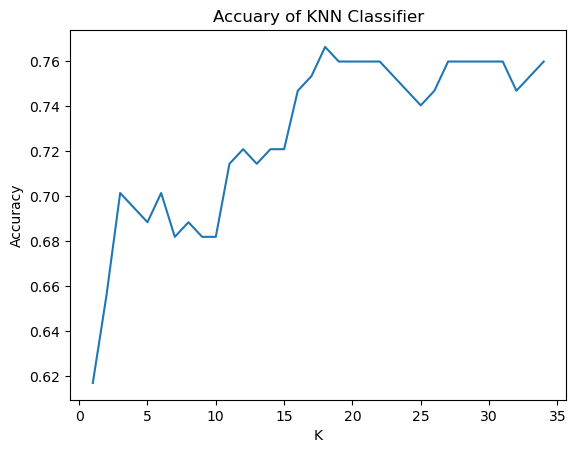

Best K value: 18


In [1375]:
# Determining K value
k_value = list(range(1,35))
accuracies = []

for k in k_value:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting visualization of accuracy
plt.plot(k_value, accuracies)
plt.title("Accuary of KNN Classifier")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

# Calculate best K value based on accuracies
best_kVal = k_value[np.argmax(accuracies)]
print("Best K value:", best_kVal)


● Run 5 fold cross validations - report mean and standard deviation

In [1376]:
# Implement KNN classifier on best K value
knn = KNeighborsClassifier(n_neighbors=best_kVal)
cv_scores = cross_val_score(knn, scaled_data, y, cv=5)

# Print mean and standard deviation of cross validation
print("Cross-validation mean:", cv_scores.mean())
print("Cross-validation standard deviation:", cv_scores.std())

Cross-validation mean: 0.8867498514557338
Cross-validation standard deviation: 0.011777773949460184


● Evaluate using confusion matrix

In [1377]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print generated confusion matrix and accuracy scores
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

Confusion matrix:
 [[89 10]
 [26 29]]
Accuracy Score:
 0.7662337662337663


● Use MARKDOWN cell to explain the accuracy of your model

Based on the best K value determined, the accuracy of the KNN model is calculated to be about 76%.

## Part 2 - Build a Naive Bayes classifier to classify the dataset

● Train three classifiers using GaussianNB, MultinomialNB, and BernoulliNB

● Split dataset into training and testing

In [1378]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training, testing, validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(491, 8) (154, 8) (491,) (154,)


In [1379]:
# Fitting NB models with training data
gNB = GaussianNB().fit(X_train, y_train)
mNB = MultinomialNB().fit(X_train, y_train)
bNB = BernoulliNB().fit(X_train, y_train)


● Run 5 fold cross validations with training set and validation set - report mean and standard deviation. Use test set (holdout set) for final testing.

In [1380]:
# 5 fold cross validation 
gNB_scores = cross_val_score(gNB, X_train, y_train, cv=5)
mNB_scores = cross_val_score(mNB, X_train, y_train, cv=5)
bNB_scores = cross_val_score(bNB, X_train, y_train, cv=5)

# Calculating means and standard deviations of NB models
gNB_mean = np.mean(gNB_scores)
gNB_std = np.std(gNB_scores)
mNB_mean = np.mean(mNB_scores)
mNB_std = np.std(mNB_scores)
bNB_mean = np.mean(bNB_scores)
bNB_std = np.std(bNB_scores)

# Printing calculated means and standard deviations
print("Gaussian Naive Bayes Mean =", gNB_mean, "Standard Deviation =", gNB_std)
print("Multinomial Naive Bayes Mean =", mNB_mean, "Standard Deviation =", mNB_std)
print("Bernoulli Naive Bayes Mean =", bNB_mean, "Std. Dev. =", bNB_std)

Gaussian Naive Bayes Mean = 0.7250257678829108 Standard Deviation = 0.028344738666736296
Multinomial Naive Bayes Mean = 0.6048649762935477 Standard Deviation = 0.05351688320098867
Bernoulli Naive Bayes Mean = 0.6395176252319109 Std. Dev. = 0.011960490880360782


In [1381]:
# Determining best classifier
best_clf = gNB if gNB_mean > mNB_mean and gNB_mean > bNB_mean else \
mNB if mNB_mean > gNB_mean and mNB_mean > bNB_mean else bNB
print("Best Naive Bayes Classifier: ", type(best_clf).__name__)

# Train the best classifier on the training set
best_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_clf.predict(X_test)

# Calculate the accuracy of the best classifier on the testing set
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing set accuracy:", test_accuracy)

Best Naive Bayes Classifier:  GaussianNB
Testing set accuracy: 0.7662337662337663


● Use MARKDOWN cell to explain the accuracy of each. Determine which NB model fits best with the data we have.

After comparing all the NB models, we can see the accuracy of the Gaussian Naive Bayes accuracy best fits the dataset that we have. As Gaussian is based on normally distributed features, it is also reflected to be best fit. On the other hand, Multinomial Naive Bayes and Bernoulli Naive Bayes did not result to have a higher accuracy score as opposed to the Gaussian model.

## Part 3 - Retrain Using Leave-One-Out
● For both classifiers, retrain using leave-one-out cross validation - report mean and standard deviation

In [1382]:
# Intialize leave one out cross validation method
leaveOneOut = LeaveOneOut()

In [1383]:
# Implemented the KNN classifier for the best K value found previously
knnModel = KNeighborsClassifier(best_kVal).fit(X_train, y_train)
knn_cv_score = cross_val_score(knnModel, X_test, y_test, cv=leaveOneOut)

# Calculate the KNN mean and standard deviation
knnModelMean = knn_cv_score.mean()
knnModelStd = knn_cv_score.std()

# Print the KNN mean and standard deviation
print("Leave-One-Out Knn Model\n Mean: ", knnModelMean, "Standard Deviation: ", knnModelStd)


Leave-One-Out Knn Model
 Mean:  0.7142857142857143 Standard Deviation:  0.45175395145262565


In [1384]:
# KNN model prediction using the X testing data
knnModelPred = knnModel.predict(X_test)

# Printing the generated confusion matrix and accuracy score
print("Confusion matrix\n", confusion_matrix(y_test, knnModelPred))
print("Accuracy Score\n", accuracy_score(y_test, knnModelPred))


Confusion matrix
 [[85 14]
 [31 24]]
Accuracy Score
 0.7077922077922078


In [1385]:
# Implemented the Gaussian NB classifier for the training data
gaussianModel = GaussianNB().fit(X_train, y_train)
gaussian_cv_score = cross_val_score(gaussianModel, X_test, y_test, cv = leaveOneOut)

# Calculate the Gaussian mean and standard deviation
gaussianModel_mean = gaussian_cv_score.mean()
gaussianModel_std = gaussian_cv_score.std()

# Print the Gaussian mean and standard deviation
print("Leave-One-Out Gaussian NB Model\n Mean: ", gaussianModel_mean, "Standard Deviation: ", gaussianModel_std)

Leave-One-Out Gaussian NB Model
 Mean:  0.7987012987012987 Standard Deviation:  0.40097073977306313


In [1386]:
# Gaussian model prediction using the X testing data
gaussianModelPred = gaussianModel.predict(X_test)

# Printing the generated confusion matric and accuracy score
print("Confusion matrix\n", confusion_matrix(y_test, gaussianModelPred))
print("Accuracy Score\n", accuracy_score(y_test, gaussianModelPred))

Confusion matrix
 [[79 20]
 [16 39]]
Accuracy Score
 0.7662337662337663


● Do you notice any accuracy improvements on our models during run time and testing time?

When computing the accuracy score on the models, the run time and test time is not visibly different, most likely because this is a smaller dataset to be classified. Generally for larger datasets, the cross validation Leave One Out method would be more time consuming as opposed to the K-fold cross validation method.

## Part 4 - KNN or NB?
● Explain whether KNN or Naive Bayes works best with our data

● Select model, and retrain your classifier with all the data available

In [1387]:
# Retraining all data with KNN Model
finalKnnModel = KNeighborsClassifier(best_kVal).fit(X, y)

finalKnnPred = finalKnnModel.predict(X)

# Printing the generated confusion matric and accuracy score
print("Confusion Matrix\n", confusion_matrix(y, finalKnnPred))
print("Accuracy Score\n", accuracy_score(y, finalKnnPred))


Confusion Matrix
 [[460  40]
 [127 141]]
Accuracy Score
 0.7825520833333334


In [1388]:
# Retraining all data with Gaussian NB Model
finalGaussianModel = KNeighborsClassifier().fit(X, y)

finalGaussianPred = finalGaussianModel.predict(X)

# Printing the generated confusion matric and accuracy score
print("Confusion Matrix\n", confusion_matrix(y, finalGaussianPred))
print("Accuracy Score\n", accuracy_score(y, finalGaussianPred))

Confusion Matrix
 [[442  58]
 [ 93 175]]
Accuracy Score
 0.8033854166666666


Based on the calculations of the accuracy scores of both the KNN model and the Gaussian NB model, it seems that the Gaussian Model is the better classifier for this dataset. The Gaussian Model has an accuracy score of about 80% whereas the KNN model has a score of about 78%; about a 2% difference.